In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from benchmarker import profile_as_dataframe, plot_profile
import numpy as np
from jina import Document, DocumentArray

In [6]:

def match_func(da_1, da_2):
    da_1.match(da_2, metric='euclidean',  limit=3)

def create_arrays(n_1, n_2, n_features):
    x_mat_1 = np.random.random((n_1, n_features))
    da_1 = DocumentArray([Document(embedding=x) for x in x_mat_1])

    np.random.seed(1234)
    x_mat = np.random.random((n_2, n_features))
    da_2 = DocumentArray([Document(embedding=x) for x in x_mat])
    return da_1, da_2
    
n_1 = 10
n_2 = 100_000
n_features = 256

In [7]:
df_result = profile_as_dataframe(create_arrays, n_1, n_2, n_features)

Timer unit: 1e-06 s

Total time: 6.3546 s
File: <ipython-input-6-1dab34e619ac>
Function: create_arrays at line 4

Line #      Hits         Time  Per Hit   % Time  Line Contents
     4                                           def create_arrays(n_1, n_2, n_features): 	 def create_arrays(n_1, n_2, n_features):
     5         1         72.0     72.0      0.0      x_mat_1 = np.random.random((n_1, n_features)) 	     x_mat_1 = np.random.random((n_1, n_features))
     6         1       3336.0   3336.0      0.1      da_1 = DocumentArray([Document(embedding=x) for x in x_mat_1]) 	     da_1 = DocumentArray([Document(embedding=x) for x in x_mat_1])
     7                                            	 
     8         1         29.0     29.0      0.0      np.random.seed(1234) 	     np.random.seed(1234)
     9         1     279781.0 279781.0      4.4      x_mat = np.random.random((n_2, n_features)) 	     x_mat = np.random.random((n_2, n_features))
    10         1    6071379.0 6071379.0     95.5     

In [8]:
df_result

,Line #,Hits,Time,Per Hit,% Time,Line Contents
0,4.0,0.0,0.0,0.0,0.0,"def create_arrays(n_1, n_2, n_features):"
1,5.0,1.0,72.0,72.0,0.0,"x_mat_1 = np.random.random((n_1, n_features))"
2,6.0,1.0,3336.0,3336.0,0.1,da_1 = DocumentArray([Document(embedding=x...
3,7.0,0.0,0.0,0.0,0.0,
4,8.0,1.0,29.0,29.0,0.0,np.random.seed(1234)
5,9.0,1.0,279781.0,279781.0,4.4,"x_mat = np.random.random((n_2, n_features))"
6,10.0,1.0,6071379.0,6071379.0,95.5,da_2 = DocumentArray([Document(embedding=x...
7,11.0,1.0,2.0,2.0,0.0,"return da_1, da_2"


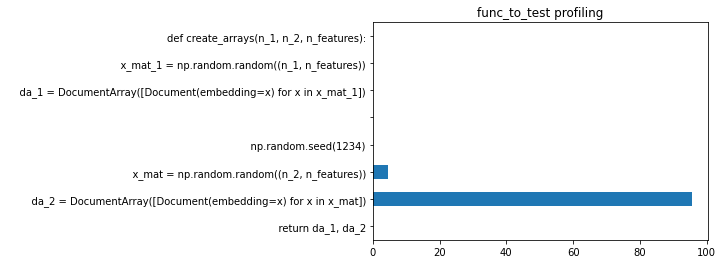

In [10]:
plot_profile(df_result)